## Simple Linear Regration

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

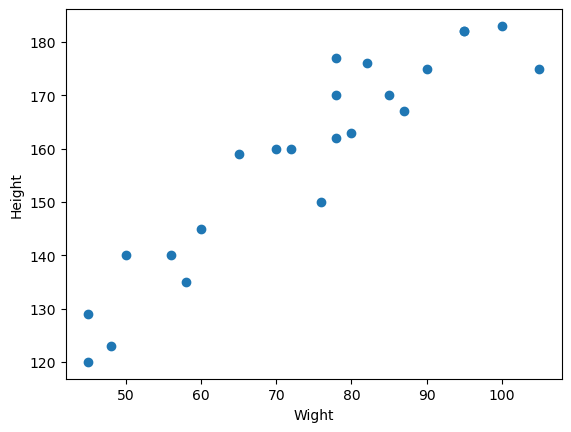

In [23]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Wight")
plt.ylabel("Height")

In [24]:
## divide dataset into indepandent and dependent edatures
X = df[["Weight"]]
y = df["Height"]

In [25]:
## Trian test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)

In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


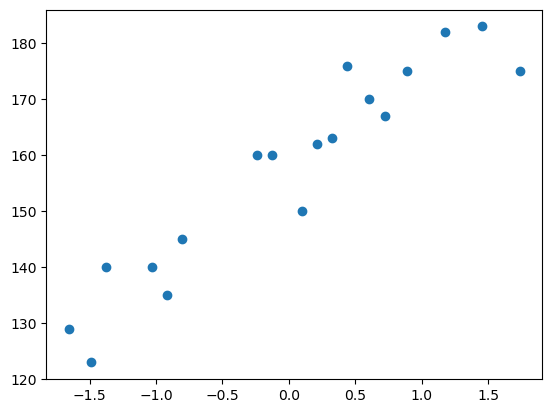

In [27]:
plt.scatter(X_train, y_train)

In [28]:
## Train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
print("The slope is", regressor.coef_)
print("The intercept is", regressor.intercept_)

The slope is [17.03440872]
The intercept is 157.5


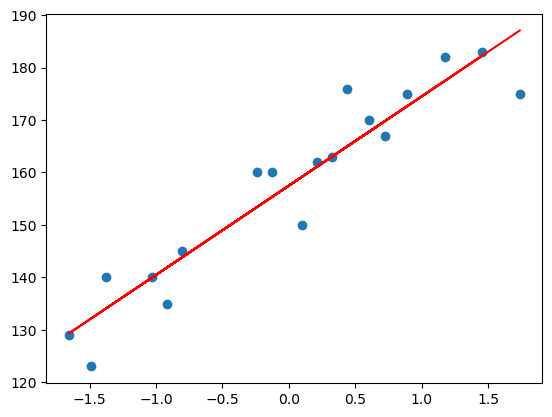

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),'r')
y_predict_test = regressor.predict(X_test)

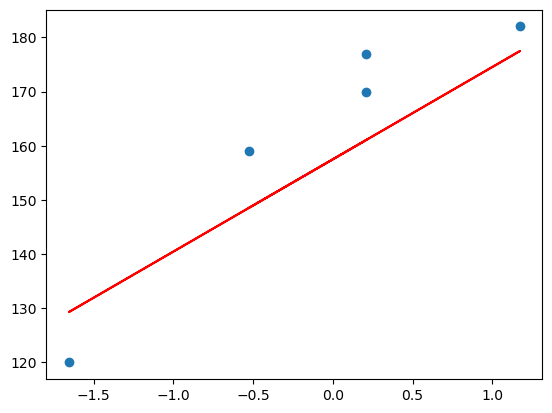

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test),'r')

In [32]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse =  mean_squared_error(y_test,y_predict_test )
mae =  mean_absolute_error(y_test,y_predict_test )
rmse = np.sqrt(mse)

In [33]:
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [34]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict_test)
print(score)

0.7769869860423441


In [41]:
new_weight = scaler.transform([[80]])

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
new_weight

array([[0.32350772]])

In [45]:
print("The hight",regressor.predict(new_weight))

The hight [163.01076266]


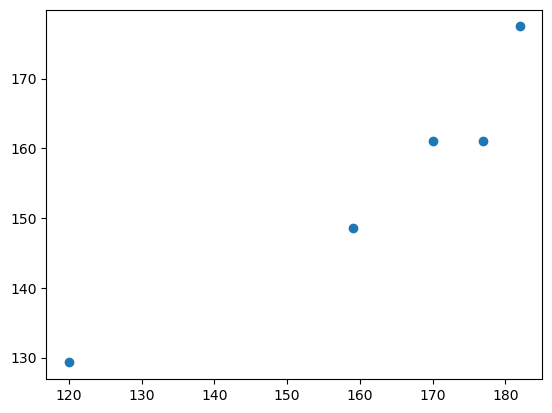

In [47]:
## Assumption
## Plot a scatter plot for the prediction 
plt.scatter(y_test, y_predict_test)

In [49]:
## Residuals
residuals = y_test-y_predict_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

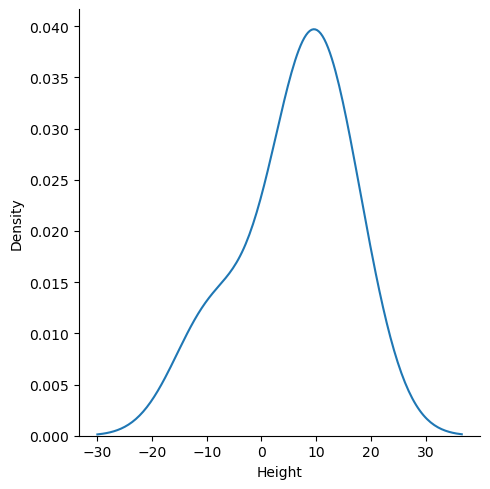

In [50]:
sns.displot(residuals, kind='kde')